In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import os

## Load the dataset

In [3]:
from DatasetHandler import DatasetHandler

### 1. Initialize the dataset handler

In [4]:
datasetHandler = DatasetHandler('EuroSAT')
datasetHandler.print_classes()

Classes: 
     Class 0 -> EuroSAT/Forest
     Class 1 -> EuroSAT/River
     Class 2 -> EuroSAT/Highway
     Class 3 -> EuroSAT/AnnualCrop
     Class 4 -> EuroSAT/SeaLake
     Class 5 -> EuroSAT/HerbaceousVegetation
     Class 6 -> EuroSAT/Industrial
     Class 7 -> EuroSAT/Residential
     Class 8 -> EuroSAT/PermanentCrop
     Class 9 -> EuroSAT/Pasture


### 2. Select the two classes for the binary classification

In [5]:
class_1 = 0 #int(input('Class 1 [0-9]: '))
class_2 = 1 #int(input('Class 2 [0-9]: '))
print(datasetHandler.classes[class_1])
print(datasetHandler.classes[class_2])

classes_name = []
classes_name.append(datasetHandler.classes[class_1].split('/')[-1])
classes_name.append(datasetHandler.classes[class_2].split('/')[-1])

EuroSAT/Forest
EuroSAT/River


### 3. Load paths and labels

In [6]:
imgs_path, imgs_label = datasetHandler.load_paths_labels(classes = [datasetHandler.classes[class_1], datasetHandler.classes[class_2]])

print('Dataset images: ', len(imgs_path))
print('Dataset labels: ', len(imgs_label))
print('Dataset sample -> image path: ', imgs_path[0], ' image label', imgs_label[0])

Dataset images:  5500
Dataset labels:  5500
Dataset sample -> image path:  EuroSAT/Forest/Forest_1721.jpg  image label [1. 0.]


### 4. Trainining-Validation split

In [7]:
train_images, train_labels, val_images, val_labels = datasetHandler.train_validation_split(imgs_path, imgs_label, split_factor = 0.2)
print('Training images: ',  train_images.shape)
print('Training labels: ',  train_labels.shape)
print('Validatiom images: ',  val_images.shape)
print('Validation labels: ',  val_labels.shape)

Training images:  (4400,)
Training labels:  (4400, 2)
Validatiom images:  (1100,)
Validation labels:  (1100, 2)


### 5. Display a sample of the dataset

In [8]:
from utils import plotDataset

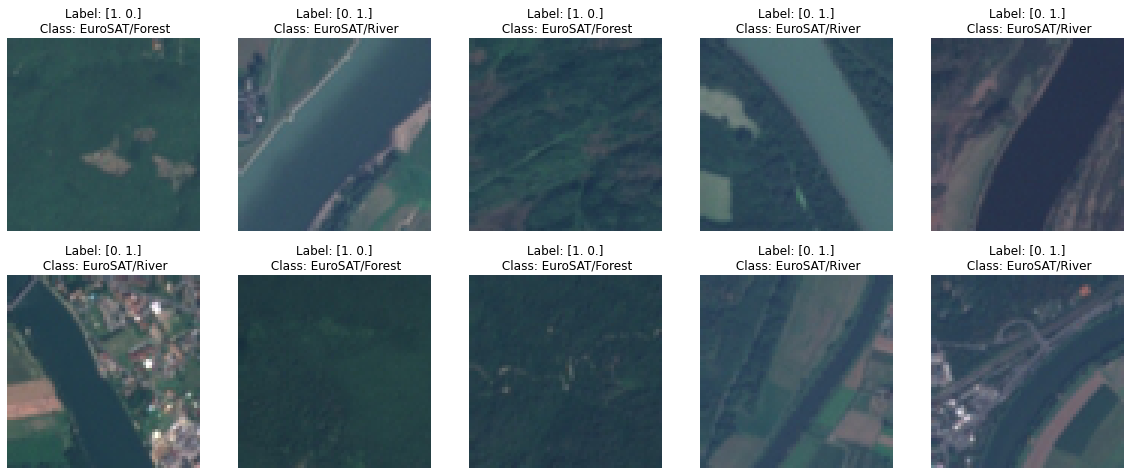

In [9]:
plotDataset(train_images, train_labels, datasetHandler.classes, 5, 2)

## CNN classifier

In [10]:
from CNN_Classifier import CNN_Classifier

### 1. Initialize the CNN model

In [11]:
img_shape = plt.imread(train_images[0]).shape
n_classes = train_labels.shape[1]

cnn = CNN_Classifier(img_shape = img_shape, n_classes = n_classes)

### 2. Train the CNN model

In [ ]:
batch_size = 1
epochs = 20
train_generator = datasetHandler.cnn_data_loader(train_images, train_labels, batch_size = batch_size, img_shape = img_shape, n_classes = n_classes)
val_generator = datasetHandler.cnn_data_loader(val_images, val_labels, batch_size = batch_size, img_shape = img_shape, n_classes = n_classes)

history = cnn.train_model(epochs, batch_size, train_generator, val_generator, len(train_images), len(val_images))

#### After training the CNN model, save it in the trained_models folder

In [14]:
cnn.model.save(os.path.join('trained_models', 'CNN-' + classes_name[0] + '-VS-' + classes_name[1] + '.h5'))

### 3. Test the CNN model

In [16]:
from tensorflow.keras.models import load_model
cnn.model = load_model(os.path.join('trained_models', 'CNN-' + classes_name[0] + '-VS-' + classes_name[1] + '.h5'))

In [ ]:
val_data_generator = datasetHandler.cnn_data_loader(val_images, val_labels, batch_size = len(val_images), img_shape = img_shape, n_classes = n_classes)
accuracy, precision, recall, f1 = cnn.evaluate_model(val_data_generator, classes_name)

## QCNN Classifier

In [18]:
from QNN4EO import QNN4EO
import torch

### 1. Initialize the model

In [19]:
qnn4eo = QNN4EO()

### 2. Traing the QNN4EO model

In [ ]:
img_shape = plt.imread(train_images[0]).shape
n_classes = train_labels.shape[1]
epochs = 20

train_generator = datasetHandler.qcnn_data_loader(train_images, train_labels, batch_size = 1, img_shape = img_shape)
history = qnn4eo.train_model(epochs, train_generator, len(train_images))

In [22]:
torch.save(qnn4eo.state_dict(), os.path.join('trained_models', 'QNN4EO-' + classes_name[0] + '-VS-' + classes_name[1] + '.h5'))

### 3. Test the QNN4EO model

In [ ]:
qnn4eo.load_state_dict(torch.load(os.path.join('trained_models', 'QNN4EO-' + classes_name[0] + '-VS-' + classes_name[1] + '.h5')))

In [ ]:
val_data_gen = datasetHandler.qcnn_data_loader(val_images, val_labels, batch_size = 1, img_shape = img_shape)
accuracy, precision, recall, f1 = qnn4eo.evaluate_model(val_data_gen, len(val_images))

# Running all the binary classification tests
### Keep Attention! This process can last a lot

45 binary classifications:
- Loading datates
- CNN training
- CNN testing
- QNN4EO training
- QNN4EO testing

In [23]:
from matplotlib.colors import LinearSegmentedColormap
from CNN_Classifier import CNN_Classifier
from DatasetHandler import DatasetHandler
from QNN4EO import QNN4EO
import seaborn as sns

In [24]:
datasetHandler = DatasetHandler('EuroSAT')

In [ ]:
epochs = 20
batch_size = 1

cnn_results = np.zeros((10, 10, 4))
qnn4eo_results = np.zeros((10, 10, 4))
classes_name = []

for i in range(10):
    class_1 = i
    classes_name.append(datasetHandler.classes[class_1].split('/')[-1])
    for j in range(10):
        if i!=j and j>i:
            class_2 = j

            print("\033[1m" + 'Load dataset:' + "\033[0m")
            print(datasetHandler.classes[class_1])
            print(datasetHandler.classes[class_2])

            cs = []
            cs.append(datasetHandler.classes[class_1].split('/')[-1])
            cs.append(datasetHandler.classes[class_2].split('/')[-1])

            imgs_path, imgs_label = datasetHandler.load_paths_labels(classes = [datasetHandler.classes[class_1], datasetHandler.classes[class_2]])
            train_images, train_labels, val_images, val_labels = datasetHandler.train_validation_split(imgs_path, imgs_label, split_factor = 0.2)

            img_shape = plt.imread(train_images[0]).shape
            n_classes = train_labels.shape[1]

            print("\033[1m" + 'Train CNN:' + "\033[0m")
            cnn = CNN_Classifier(img_shape = img_shape, n_classes = n_classes)
            train_generator = datasetHandler.cnn_data_loader(train_images, train_labels, batch_size = batch_size, img_shape = img_shape, n_classes = n_classes)
            val_generator = datasetHandler.cnn_data_loader(val_images, val_labels, batch_size = batch_size, img_shape = img_shape, n_classes = n_classes)
            history = cnn.train_model(epochs, batch_size, train_generator, val_generator, len(train_images), len(val_images))

            print("\033[1m" + 'Test CNN:' + "\033[0m")
            val_data_generator = datasetHandler.cnn_data_loader(val_images, val_labels, batch_size = len(val_images), img_shape = img_shape, n_classes = n_classes)
            cnn_results[i,j,...] = cnn.evaluate_model(val_data_generator, cs)
            
            cnn.model.save(os.path.join('trained_models', 'CNN-' + cs[0] + '-VS-' + cs[1] + '.h5'))

            print("\033[1m" + 'Train QNN4EO:' + "\033[0m")
            qnn4eo = QNN4EO()
            img_shape = plt.imread(train_images[0]).shape
            train_generator = datasetHandler.qcnn_data_loader(train_images, train_labels, batch_size = batch_size, img_shape = img_shape)
            loss_list = qnn4eo.train_model(epochs, train_generator, len(train_images))

            print("\033[1m" + 'Test QNN4EO:' + "\033[0m")
            val_data_gen = datasetHandler.qcnn_data_loader(val_images, val_labels, batch_size = batch_size, img_shape = img_shape)
            qnn4eo_results[i,j,...] = qnn4eo.evaluate_model(val_data_gen, len(val_images))

            torch.save(qnn4eo.state_dict(), os.path.join('trained_models', 'QNN4EO-' + cs[0] + '-VS-' + cs[1] + '.h5'))

        elif i==j:
            cnn_results[i,j] = np.nan
            qnn4eo_results[i,j] = np.nan
            
# Fill the lower triangular matrix with the upper triangluar one
cnn_results[...,0] = cnn_results[...,0] + cnn_results[...,0].T
cnn_results[...,1] = cnn_results[...,1] + cnn_results[...,1].T
cnn_results[...,2] = cnn_results[...,2] + cnn_results[...,2].T
cnn_results[...,3] = cnn_results[...,3] + cnn_results[...,3].T

qnn4eo_results[...,0] = qnn4eo_results[...,0] + qnn4eo_results[...,0].T
qnn4eo_results[...,1] = qnn4eo_results[...,1] + qnn4eo_results[...,1].T
qnn4eo_results[...,2] = qnn4eo_results[...,2] + qnn4eo_results[...,2].T
qnn4eo_results[...,3] = qnn4eo_results[...,3] + qnn4eo_results[...,3].T

## Confusion matricies

In [ ]:
cmap = LinearSegmentedColormap.from_list(
    name='red-green', 
    colors=['red','green']
)

sns.set(font_scale=2)

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (30, 10))

sns.heatmap(cnn_results[...,0], linewidth=0.5, fmt='.1f', square = True, cmap = cmap, 
            annot = True, xticklabels = classes_name, yticklabels = classes_name, ax = axes[0]).set(title='CNN (Accuracy)')
sns.heatmap(qnn4eo_results[...,0], linewidth=0.5, fmt='.1f', square = True, cmap = cmap, 
            annot = True, xticklabels = classes_name, yticklabels = classes_name, ax = axes[1]).set(title='QNN4EO (Accuracy)')
plt.show()

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (30, 10))
sns.heatmap(cnn_results[...,1], linewidth=0.5, fmt='.1f', square = True, cmap = cmap, 
            annot = True, xticklabels = classes_name, yticklabels = classes_name, ax = axes[0]).set(title='CNN (Precision)')
sns.heatmap(qnn4eo_results[...,1], linewidth=0.5, fmt='.1f', square = True, cmap = cmap, 
            annot = True, xticklabels = classes_name, yticklabels = classes_name, ax = axes[1]).set(title='QNN4EO (Precision)')
plt.show()

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (30, 10))
sns.heatmap(cnn_results[...,2], linewidth=0.5, fmt='.1f', square = True, cmap = cmap, 
            annot = True, xticklabels = classes_name, yticklabels = classes_name, ax = axes[0]).set(title='CNN (Recall)')
sns.heatmap(qnn4eo_results[...,2], linewidth=0.5, fmt='.1f',  square = True, cmap = cmap, 
            annot = True, xticklabels = classes_name, yticklabels = classes_name, ax = axes[1]).set(title='QNN4EO (Recall)')
plt.show()

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (30, 10))
sns.heatmap(cnn_results[...,3], linewidth=0.5, fmt='.1f', square = True, cmap = cmap, 
            annot = True, xticklabels = classes_name, yticklabels = classes_name, ax = axes[0]).set(title='CNN (F1)')
sns.heatmap(qnn4eo_results[...,3], linewidth=0.5, fmt='.1f', square = True, cmap = cmap, 
            annot = True, xticklabels = classes_name, yticklabels = classes_name, ax = axes[1]).set(title='QNN4EO (F1)')
plt.show()

# Paper Results

In [ ]:
from paper_results import import_results
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap
from CNN_Classifier import CNN_Classifier
from QNN4EO import QNN4EO


cnn_results, qnn4eo_results, classes_name = import_results()

cmap = LinearSegmentedColormap.from_list(
    name='red-green', 
    colors=['red','green']
)

sns.set(font_scale=2)

fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (30, 11))
sns.heatmap(cnn_results, linewidth=0.5, fmt='.1f', square = True, cmap = cmap, 
            annot = True, xticklabels = classes_name, yticklabels = classes_name, ax = axes[0]).set(title='CNN (Accuracy)')
sns.heatmap(qnn4eo_results, linewidth=0.5, fmt='.1f', square = True, cmap = cmap, 
            annot = True, xticklabels = classes_name, yticklabels = classes_name, ax = axes[1]).set(title='QNN4EO (Accuracy)')
plt.show()